# TP2

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from collections import defaultdict
import sys
import spacy
nlp = spacy.load('fr_core_news_md')
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer un fichier contenant le texte de tous les bulletins de l'année 1865

In [2]:
# Choisir une année
year = 1865

In [3]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1865_Tome_I1_Part_2.txt',
 'Bxl_1865_Tome_I1_Part_3.txt',
 'Bxl_1865_Tome_I1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_3.txt',
 'Bxl_1865_Tome_II1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_5.txt',
 'Bxl_1865_Tome_II1_Part_6.txt',
 'Bxl_1865_Tome_II1_Part_7.txt']

In [4]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [5]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [6]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["abord", "acceptée", "accord", "accorder", "acte", "action", "actuel", "adjudication", "administration", "admis", "adopté", "adoptées", "adoption", 
       "adresse", "adressées", "affaire", "afin", "agit", "ailleurs", "ainsi", "ajouter", "alors", "amendement", "anderlecht", "année", "années", "annuel", "ans", "août", 
       "appartenant", "appel", "application", "approbation", "approuvé", "après", "ares", "argent", "arrêté", "art", "article", "articles", "assez", 
       "assurer", "aucun", "aucune", "augmenter", "aujourd", "aussi", "autant", "auteur", "autorisation", "autorisé", "autoriser", "autorité", "autre", 
       "autres", "avant", "avenir", "avenue", "avis", "avoir", "avril", "bas", "base", "bases", "bâtiment", "bâtiments", "bâtisses", "beaucoup", "beaux", 
       "besoin", "besoins", "bien", "bienfaisance", "biens", "bon", "boulangerie", "boulevard", "bourgmestre", "bruxelles", "bulletin", "bureau", "bureaux", 
       "but", "caisse", "car", "carrés", "cas", "cause", "cela", "celle", "celles", "celte", "celui", "cent", "centiares", "centimes", "centimètres", 
       "cependant", "certain", "certaines", "certains", "cet", "cette", "ceux", "chacun", "chapitre", "chaque", "charge", "charger", "charges", "charité", 
       "chaussée", "chef", "chez", "chiffre", "chiffres", "chose", "choses", "cinq", "circonstances", "classe", "collège", "collègue", "comité", "comme", 
       "comment", "commission", "communal", "communale", "communales", "communaux", "commune", "communes", "compagnie", "compagnies", "compris", "compte", 
       "concerne", "concession", "conclusion", "conclusions", "condition", "conditions", "conformément", "connaissance", "connaître", "conseil", 
       "conseillers", "conséquence", "considérable", "considérables", "considère", "contenance", "contentieux", "contraire", "contrat", "contre", "convention", "côté", 
       "courant", "cours", "créances", "créer", "crois", "dame", "date", "décembre", "décembre.", "décision", "déclaration", "dehors", "déjà", "delà", 
       "délai", "délibération", "demande", "demandé", "demander", "demandes", "demeurant", "dépôt", "depuis", "députation", "dêputation", "dernier", 
       "dernière", "dès", "dessus", "deux", "deuxième", "devant", "devis", "devoir", "devons", "devront", "différence", "difficile", "difficultés", 
       "dire", "direction", "discussion", "disposition", "dispositions", "dit", "divers", "diverses", "division", "dix", "doit", "doivent", "donation", 
       "donc", "donne", "donné", "donnée", "donner", "dont", "double", "doute", "droits", "echevin", "échevin", "echevins", "échevins", "effet", "également", 
       "égard", "église", "élevé", "elles", "émettre", "emplacement", "emploi", "encore", "enfin", "engage", "enquête", "ensemble", "ensuite", "entendu", 
       "entre", "entrée", "entreprise", "environ", "époque", "ester", "établi", "établir", "établissement", "établissements", "etat", "état", "etc", "être", 
       "etterbeek", "étude", "évaluation", "évaluations", "examen", "exécuter", "exécution", "exemple", "exercice", "existe", "extraordinaires", "fabrique", "face", 
       "facile", "façon", "faire", "fait", "faite", "faites", "faits", "famille", "faudrait", "faut", "favorable", "fera", "février", "filles", "fixé", 
       "fois", "fonds", "font", "forme", "fort", "frais", "francs", "garde", "général", "générale", "grand", "grande", "grandes", "grands", "grandvelle", 
       "habitants", "habitations", "haut", "haute", "herpels", "het", "heure", "heures", "hommes", "honneur", "honorable", "hospice", "hospices", "hôtel", "hui", 
       "huit", "ici", "idée", "idem", "ils", "immédiatement", "immeuble", "immeubles", "impasse", "impasses", "importance", "impossible", "inconvénient", "inconvénients", 
       "indispensable", "industrie", "informe", "inscription", "instruction", "intenter", "intérêt", "intérêts", "jamais", "janvier", "jean", "jour", "jours", "juillet", 
       "juin", "jusqu", "juste", "justice", "kil", "laeken", "laisser", "laquelle", "lecture", "legs", "lequel", "les", "lettre", "lettres", "leurs", "libre", "lieu", 
       "liste", "lit", "local", "location", "locaux", "loi", "loin", "longtemps", "lors", "lorsqu", "lorsque", "lot", "mai", "maintenant", "maison", 
       "maisons", "malgré", "manière", "marchai", "mars", "matériaux", "matières", "matin", "membre", "membres", "mêmes", "ménage", "messieurs", "mesures", 
       "mètre", "mètres", "mettre", "mieux", "mille", "millions", "minimes", "mis", "moins", "mois", "moment", "montant", "mots", "mouvement", "moyen", 
       "moyenne", "moyens", "nature", "nécessaire", "nécessaires", "nécessité", "neuf", "noires", "nom", "nombre", "nombreux", "non", "notaire", "nouveau", 
       "nouveaux", "nouvelle", "nouvelles", "novembre", "objet", "objets", "observation", "observations", "obtenir", "obtenu", "occasion", "octobre", 
       "officiers", "onze", "opinion", "ordinaires", "ordonnance", "ordre", "outre", "ouverte", "ouverture", "paiement", "pain", "paraît", "parce", 
       "parfaitement", "parmi", "part", "partie", "parties", "partir", "passé", "payer", "pays", "pendant", "pense", "permanente", "perpétuité", "personne", "personne", 
       "personnel", "personnelle", "personnes", "petit", "petite", "peu", "peut", "peuvent", "pièces", "pierre", "pierres", "place", "plus", "plusieurs", 
       "point", "populaire", "population", "portant", "porté", "portée", "position", "possible", "pourquoi", "pourra", "pourrait", "pouvoir", 
       "pouvons", "premier", "première", "prendre", "près", "présence", "présent", "présente", "présenté", "présenter", "présents", "principal", 
       "principale", "principe", "pris", "procédé", "procès", "prochain", "prochaine", "produit", "profit", "proportion", "propose", "proposé", "proposer", 
       "proposition", "propositions", "propriétaire", "propriétaires", "propriété", "propriétés", "provincial", "provisoire", "public", "publics", "publique", 
       "publiques", "puis", "puisque", "puisse", "pyck", "quand", "quant", "quartier", "quatre", "quelque", "quelques", "question", "questions", "quoi", "raison", 
       "rapport", "rapports", "receveur", "recevoir", "réclamation", "réclamations", "reçu", "règlement", "relatif", "relatives", "remarquer", 
       "remboursement", "rendre", "renseignements", "rentes", "renvoi", "résolution", "ressources", "reste", "résultat", "résulte", "rien", 
       "rue", "rues", "saint", "sainte", "salle", "salles", "sans", "sauf", "savoir", "seance", "séance", "second", "seconde", "secours", 
       "secrétaire", "secrétariat", "section", "sections", "semble", "sens", "sept", "septembre", "sépulture", "service", "seul", "seule", 
       "seulement", "sieur", "simple", "sise", "situation", "situé", "situés", "six", "société", "sociétés", "sœurs", "sollicite", "solution", 
       "sorte", "soumettre", "soumis", "soumission", "soumissions", "sous", "souvent", "suit", "suite", "suivant", "suivante", "suivantes", "suivants", 
       "sujet", "supérieure", "supplémentaire", "surtout", "système", "tableau", "tandis", "tant", "tard", "tel", "telle", "temps", "tendant", 
       "termes", "terrain", "terrains", "territoire", "titre", "total", "toujours", "tous", "tout", "toute", "toutes", "transmettre", "travai", 
       "travail", "très", "trois", "troisième", "trop", "trouve", "trouvent", "trouver", "trouvés", "unanimité", "usage", "utilité", "valeur", 
       "van", "vanhelst", "vend", "vendre", "verbal", "verbal", "vers", "veuve", "vient", "vieux", "ville", "villes", "vingt", "vis", "voici", 
       "voir", "voix", "volume", "vote", "voté", "voter", "voyez", "vrai", "vue"]
sw = set(sw)


### Créer la fonction de nettoyage

In [7]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [8]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1865_clean.txt!'

In [9]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'semestre imprimerie bols wittouck samedi numéro nommé grade instituteur écoles communaleles sieurs coenderaet michel bondt égide aelen baptiste nommé jules guillery avocat délivré florent joseph certificat bonne conduite exigé code criminelle appui réhabilitation prix publie ofliciers police marché porcs vancalster teinturiers vandervoorst chats granvelle degrave devillé denora boulang écon tanneurs nieuwenhove vanrolterdam wyns tanneurs vanlaethem remp moines bellis montagne géants dewachter re'

In [10]:
frequencies = Counter(after.split())
print(frequencies.most_common(200))

[('travaux', 775), ('projet', 576), ('droit', 343), ('taxe', 324), ('prix', 322), ('somme', 315), ('finances', 314), ('plan', 282), ('senne', 274), ('impôt', 271), ('dépenses', 254), ('watteeu', 253), ('cour', 237), ('montagne', 234), ('construction', 232), ('eau', 231), ('dépense', 226), ('assainissement', 225), ('eaux', 224), ('anspach', 221), ('police', 207), ('orts', 201), ('enfants', 189), ('gouvernement', 186), ('parc', 177), ('midi', 171), ('voie', 171), ('subside', 169), ('vente', 167), ('budget', 161), ('bois', 155), ('beyaert', 149), ('tielemans', 147), ('marché', 144), ('école', 142), ('vadder', 139), ('recettes', 134), ('entretien', 132), ('fontainas', 131), ('constructions', 128), ('goffart', 121), ('revenu', 119), ('leclercq', 118), ('succession', 117), ('lacomblé', 116), ('augmentation', 115), ('fer', 112), ('pauvres', 112), ('porte', 111), ('additionnels', 106), ('voitures', 104), ('royal', 101), ('égouts', 101), ('contribution', 100), ('largeur', 99), ('écoles', 96), (

## Nuage de mots pour l'année 1865

### Créer, stocker et afficher le nuage de mots

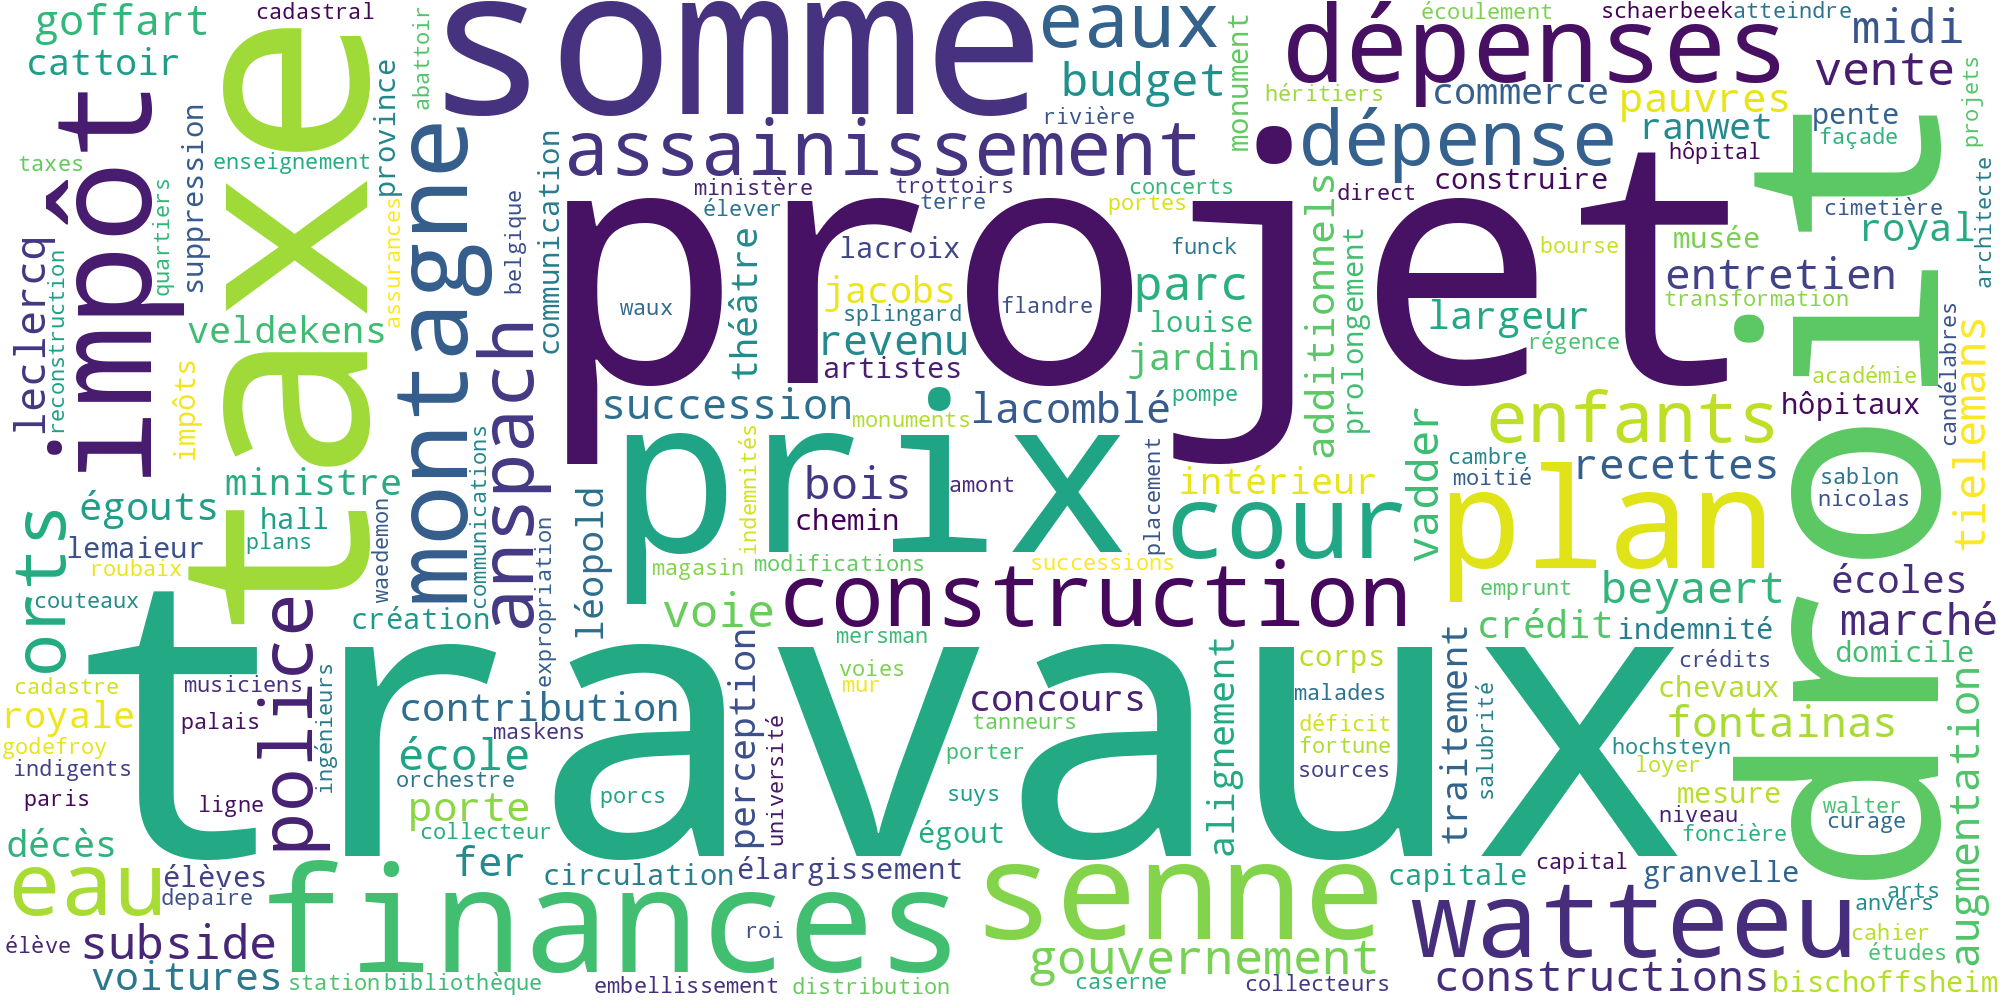

In [12]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy appliquée aux bulletins de l'année 1865

In [73]:
# Charger le texte
n=900000
text = open(os.path.join(temp_path, f'{year}_clean.txt'), encoding='utf-8').read()[:n]

In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

In [ ]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [ ]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

# Sentiment analysis avec Textblob-FR

In [ ]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment de 10 phrases reprises aléatoirement dans les bulletins de l'année 1865

In [ ]:
get_sentiment("Loin de moi la pensée de m'associer à n'importe quelle exagération et de substituer le flamand au français ; mais je crois qu'il est de l'intérêt de l'administration et d'une bonne politique de ne pas méconnaître les devoirs que la position de capitale impose à Bruxelles, et de maintenir les deux langues sur un pied d'égalité là où cela est possible.")

In [ ]:
get_sentiment("L'expertise aura lieu de sept à huit heures du matin ; passé cette dernière heure, les viandes n'y seront plus admises.")

In [ ]:
get_sentiment("Par testament olographe, en date du 8 mai 1855, déposé chez M . le notaire Peeters, à Puers, la dame Marie-Livine De Middeleer,veuve Papon, a légué à la fabrique de l'église SS. Michel et Gudule, une somme de 4,000 francs, à charge par celle-ci de faire dire annuellement cent messes basses pour le repos de son âme et de celle de son mari.")

In [ ]:
get_sentiment("La rue Montagne de la Cour serait laissée dans son état actuel, et on conserverait le disgracieux pâté de maisons qui existe entre cette artère et la rue des Trois-Têtes.")

In [ ]:
get_sentiment("Si, d'un côté, nous avons eu à déplorer souvent le délabrement et l'excessive malpropreté des logements, dus la plupart du temps à l'incurie des locataires, d'un autre côté, nous avons été souvent frappés d'admiration à la vue d'habitations où les conditions hygiéniques sont observées avec une minutie qu'on rencontre rarement dans des classes plus élevées de la société.")

In [ ]:
get_sentiment("Les mutations dans le personnel subalterne sont plus nombreuses : parmi les agents nouvellement nommés, plusieurs n'ont pas répondu à notre attente ; d'autres n'ont pu s'accoutumer aux fatigues et aux exigences de leur nouvelle position.")

In [ ]:
get_sentiment("Mais il faut convenir que ces exceptions se multiplient tellement qu'elles finissent par devenir la règle.")

In [ ]:
get_sentiment("Ce n'a été, on ne peut trop le répéter, que grâce à leur désintéressement et à leur dévouement sans bornes, joints aux avantages tout particuliers que présente la capitale pour le haut enseignement, que l'Université de notre ville est parvenue au degré de prospérité où nous la voyons arrivée aujourd'hui.")

In [ ]:
get_sentiment("Comme vient de vous le dire l'honorable membre, le magnifique élan de charité qui s'est produit à l'occasion de la catastrophe de Dour, a eu pour effet de réduire, dans de notables' proportions, les sommes que les particuliers ont l'habitude d'ajouter aux fonds mis par le Conseil à la disposition du Bourgmestre, dans l'intérêt d'une certaine catégorie des pauvres de la capitale.")

In [ ]:
get_sentiment("Nous avons choisi, pour garder nos squares, d'anciens sapeurs-pompiers en retraite.")